In [ ]:
! pip install gensim

### To Use the Code in Google Colab

To run the notebooks and access the data in Google Colab, follow these steps:

1. **Create a Google account** if you don't already have one. This gives you access to both Colab and Google Drive.

2. **Use the shared link** provided to you to copy (clone) the notebooks into your own Google Drive.

3. **Download the corpora and exercise files** from the link provided, and upload them to your Google Drive.

4. **Grant Colab access to your Google Drive** by running the following code:

```python
from google.colab import drive
drive.mount('/content/drive')
```


5. **You can now easily read files from your Google Drive** using standard file paths.

---
---

In [ ]:
# Uncomment when you use colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from IPython.display import clear_output
import time
def countdown_timer(seconds):
    for i in range(seconds, -1, -1):
        clear_output(wait=True)
        print(f"⏳ Time remaining: {i} seconds")
        time.sleep(1)
    print("✅ Time's up!")

In [21]:
# Machine Learning
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import numpy as np 



# Natural Language Processing
import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import unicodedata  # For accent removal

# Embedding
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# Standard library imports
import os
import string
import re

# Visualization
import matplotlib.pyplot as plt

In [4]:
# Initialize stemmer
lemmatizer = WordNetLemmatizer()

In [5]:
stop_words = set(nltk.corpus.stopwords.words('english'))
punctuations = set(string.punctuation)

a# Session 3 – Embedding-Based Representation of Documents

In this session, we move beyond simple count-based representations (like Bag of Words and TF-IDF) and explore **embedding-based methods**.

These methods represent words and documents as **dense numerical vectors** that capture semantic meaning and contextual relationships.

### Goals of this session:

- Understand how **word embeddings** (e.g., Word2Vec, GloVe) represent word meaning in vector space
- Learn how to obtain **document embeddings** by aggregating word vectors or using models like Doc2Vec
- Compare embedding-based representations with traditional BoW or TF-IDF approaches

Embedding methods allow for more advanced tasks such as semantic similarity, clustering, classification, and topic modeling.


# Vector Space model Intuition 

## A Deeper Look Inside Content

We often begin discussions about **word embeddings** by revisiting the limitations of traditional **Bag of Words (BoW)** representations.

While BoW is simple and interpretable, it suffers from several key disadvantages:

- **Loss of Context**
  BoW treats words independently and ignores word order, meaning, and grammatical structure.

- **Dimensionality Explosion**
  The vocabulary size determines the number of features, which can be extremely large in real-world corpora.

- **Data Sparsity**
  Most documents only contain a small subset of all possible words, leading to sparse matrices.

- **Difficulty with Synonymy and Polysemy**
  BoW cannot recognize that "happy" and "joyful" are similar, or that "bank" can mean different things in different contexts.

- **Computational Inefficiency**
  Sparse, high-dimensional matrices increase memory usage and computation time in downstream tasks.

To address these issues, we move toward **embedding-based models**, which represent words (and documents) as dense, low-dimensional vectors that preserve semantic relationships.


---
---

## The Basic Idea Behind Word Embedding

### Distributed representation - Institution

The core idea behind **word embeddings** is that we learn the meaning of a word from the **words that surround it**.

> "You shall know a word by the company it keeps."
> — Ludwig Wittgenstein, philosopher of language

### How it works:

- Word embedding algorithms are trained to **predict words based on their context** (or vice versa).
- They learn from large amounts of text and aim to capture **semantic relationships** between words.
- The objective is to **minimize the error** in predicting surrounding or next words given a target word.

### Result:

Each word is represented as a **dense vector** in a continuous vector space, where:
- Words that appear in **similar contexts** are placed **close together** in the space.
- These vectors can capture relationships like:
  - `"king" - "man" + "woman" ≈ "queen"`



---
---

### One-Hot Encoding vs. Dense Vector Embedding

**One-Hot Encoding**

In one-hot encoding, each word is represented by a **binary vector** the same length as the vocabulary.

- The vector is **all zeros** except for a `1` in the position corresponding to the word.
- This representation is **high-dimensional** and **sparse**.
- It does **not capture any meaning or relationship** between words.

**Example**

Vocabulary = ["cat", "dog", "fish", "bird"]

| Word  | One-Hot Vector         |
|-------|------------------------|
| cat   | [1, 0, 0, 0]           |
| dog   | [0, 1, 0, 0]           |
| fish  | [0, 0, 1, 0]           |
| bird  | [0, 0, 0, 1]           |

Notice: All vectors are equally distant—no semantic similarity.

---

**Dense Vector (Embedding)**

In dense vector representations (like Word2Vec or GloVe), each word is mapped to a **low-dimensional, real-valued vector**.

- These vectors are **learned from data** based on word usage and context.
- Words with **similar meanings** have **similar vectors**.

#### Example (simplified):

| Word  | Dense Vector              |
|-------|---------------------------|
| cat   | [0.62, 0.13, 0.77]        |
| dog   | [0.60, 0.10, 0.79]        |
| fish  | [0.18, 0.85, 0.25]        |
| bird  | [0.55, 0.11, 0.80]        |

Here, "cat", "dog", and "bird" have similar vectors, reflecting their semantic closeness as animals.



## Types of Word Embedding Algorithms

Several algorithms and techniques have been developed to represent words as dense vectors based on their usage in language. These can be grouped into the following major categories:

1. **Latent Semantic Analysis (LSA)**
- A statistical technique based on matrix decomposition (e.g., Singular Value Decomposition).
- Reduces the dimensionality of the document-term matrix to capture **semantic structure**.
- One of the earliest methods for capturing meaning beyond raw counts.

2. **Neural Word Embedding**
- Predictive models trained on large text corpora.
- Examples include:
  - **Word2Vec** (Skip-gram, CBOW)
  - **GloVe** (Global Vectors for Word Representation)
  - **FastText** (captures subword information)
- Learn embeddings by **predicting context words** or **factorizing co-occurrence matrices**.

3. **Pretrained Embeddings**
- Word vectors trained on very large corpora (e.g., Wikipedia, Common Crawl).
- Common pretrained models:
  - **GloVe** (Stanford)
  - **FastText** (Facebook)
  - **Word2Vec** (Google News)
- Can be imported and used directly for downstream tasks, saving time and resources.

4. **Embeddings in Large Language Models (LLMs)**
- Modern models like **BERT**, **GPT**, and **RoBERTa** use **contextual embeddings**.
- A word’s representation depends on the **surrounding context** (e.g., "bank" in a river vs. financial sentence).
- These embeddings are dynamic and **deeply contextualized**, capturing grammar, syntax, and semantics.


# Some word embedding models

## Embedding Algorithms We Will Explore

In this session, we will examine and compare **three key types of word embedding algorithms**. Each of these methods transforms words into dense vectors, but they differ in how they learn those vectors.

### Algorithms:

1. **Latent Semantic Analysis (LSA)**
   - Based on linear algebra and matrix decomposition (e.g., SVD).
   - Captures latent structure from a document-term matrix.
   - Unsupervised and relies on word co-occurrence patterns.

2. **Word2Vec**
   - A neural embedding model introduced by Google.
   - Two architectures: **Skip-gram** and **CBOW (Continuous Bag of Words)**.
   - Learns word vectors by predicting context words in a sentence.

3. **GloVe (Global Vectors for Word Representation)**
   - Developed by Stanford NLP Group.
   - Combines global co-occurrence statistics with local context.
   - Produces embeddings where vector differences encode semantic relationships.

4. **FastText**
   - Developed by Facebook AI Research.
   - Extends Word2Vec by including **subword (character n-gram) information**.
   - Better handle rare and out-of-vocabulary words by learning representations for word fragments.

These models help us understand the **semantic structure** of language and serve as a foundation for many NLP tasks.

---
---

### Example 1 - LSA

In [6]:
ListUNSpeech = []  # Create an empty dictionary to store file name and text content

# comment the line 7 and uncomment line 8 if you are using colab
# Define the directory containing the text files
fileAddress1 = '../../corpusExample/unSpeeches2000_2010'
# fileAddress1 = '/content/drive/My Drive/corpusExample/unSpeeches2000_2010'

# Loop through all files in the directory
# For each file:
#   - Open it
#   - Read its content (converted to lowercase)
#   - Store it in the dictionary with the filename (without '.txt') as the key
for file in os.listdir(fileAddress1):
    with open(os.path.join(fileAddress1, file), 'r', encoding='utf-8', errors='ignore') as textFile:
        text = textFile.read().lower()
        ListUNSpeech.append(text)


# Step 1: Define a custom analyzer for CountVectorizer
def custom_preprocessor(text):
    # Normalize and remove accents
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Lowercase the text and remove digits
    text = re.sub(r'\d+', '', text.lower())

    # Tokenize the text
    tokens = nltk.tokenize.word_tokenize(text)

    # Remove stopwords, punctuation, and non-alphabetic tokens; then lemmatize
    tokens = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if token.isalpha() and token not in stop_words and token not in punctuations
    ]

    return tokens

# Step 2: Create a CountVectorizer using the custom analyzer
# - min_df=0.1: keep words appearing in at least 10% of documents
# - max_df=0.9: exclude words appearing in more than 90% of documents
tfidfVectorizer = TfidfVectorizer(
    analyzer=custom_preprocessor,
    min_df=0.1,
    max_df=0.9
)
X_tfidf = tfidfVectorizer.fit_transform(ListUNSpeech)

# Step 2: Apply LSA using TruncatedSVD
lsa = TruncatedSVD(n_components=2, random_state=42)  # Reduce to 2 topics
X_lsa = lsa.fit_transform(X_tfidf)

# Step 3: Show results
print("LSA Components (Topics):")
print(lsa.components_)

print("\nDocument-topic matrix:")
print(X_lsa)

print("\nTop terms per topic:")
terms = tfidfVectorizer.get_feature_names_out()
for i, comp in enumerate(lsa.components_):
    terms_in_topic = [terms[i] for i in comp.argsort()[:-6:-1]]  # top 5 terms
    print(f"Topic {i + 1}: {', '.join(terms_in_topic)}")


LSA Components (Topics):
[[ 0.01820782  0.03273716  0.01384281 ...  0.015755    0.01276163
   0.01461361]
 [ 0.00643412  0.00632423 -0.00139899 ... -0.00774904  0.00222931
  -0.00607517]]

Document-topic matrix:
[[ 0.32522412 -0.14734447]
 [ 0.24532669 -0.11667447]
 [ 0.39112128 -0.1332889 ]
 ...
 [ 0.52457764  0.09716866]
 [ 0.55992946  0.10370472]
 [ 0.52722508  0.07752126]]

Top terms per topic:
Topic 1: right, council, global, human, government
Topic 2: island, climate, small, pacific, change


---
---

### Exercise 3.1

In [ ]:
countdown_timer(300)

---
---

### Example 2 - Word2Vec

In [16]:
# Step 1: Create an empty list to store sets of lemmatized words from AFG speeches
ListUNSpeechAFG = []

# Step 2: Define the directory containing the text files
fileAddress1 = '../../corpusExample/unSpeeches2000_2010'

# Step 3: Define the text cleaning function
def text_cleaner(text):
    # Tokenize the text into words
    tokens = nltk.tokenize.word_tokenize(text)

    # Lowercase, remove stopwords and punctuation
    cleaned_tokens = [
        word.lower()
        for word in tokens
        if word.lower() not in stop_words and word.lower() not in punctuations and word.isalpha()
    ]

    # Apply lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in cleaned_tokens]

    return lemmatized_tokens

# Step 4: Loop through all AFG speech files and preprocess them
for file in os.listdir(fileAddress1):
    if file.startswith("AFG"):  # Filter for Afghanistan
        with open(os.path.join(fileAddress1, file), 'r', encoding='utf-8', errors='ignore') as textFile:
            raw_text = textFile.read()
            cleaned_tokens = text_cleaner(raw_text)
            ListUNSpeechAFG.append(cleaned_tokens)  # Append token lists (not sets!) for Word2Vec


# Train the Word2Vec model on tokenized AFG speeches
model = Word2Vec(
    sentences=ListUNSpeechAFG,   # List of tokenized documents (each is a list of words)
    vector_size=100,             # Size of the word vectors (dimensionality of the embedding space)
    window=5,                    # Maximum distance between a target word and words around it (context window)
    min_count=1,                 # Ignores all words that appear fewer than 1 time in the corpus
    workers=4                    # Number of CPU cores to use for training (parallelization)
)

# Retrieve the vector for the word 'afghanistan'
vector = model.wv['afghanistan']

In [17]:
# Find and print the most similar words
similar_words = model.wv.most_similar('afghanistan', topn=5)
print("Top 5 words similar to 'afghanistan':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

Top 5 words similar to 'afghanistan':
world: 0.8868
international: 0.8821
terrorism: 0.8821
united: 0.8782
terrorist: 0.8756


---
---

### Exercise 3.2

In [ ]:
countdown_timer(300)

---
---

### Example 3 - Use a pre-trained model (google News)

In [19]:
# Load pre-trained Word2Vec model (Google News vectors - ~1.5GB)
model_path = '../../embeddingModels/GoogleNews-vectors-negative300.bin.gz'

model = KeyedVectors.load_word2vec_format(model_path, binary=True)

# Get top 5 similar words to "Law"
similar_words = model.most_similar('afghanistan', topn=5)

# Print them
print("Top 5 words similar to 'afghanistan':")
for word, score in similar_words:
    print(f"{word}: {score:.3f}")

Top 5 words similar to 'afghanistan':
iraq: 0.729
Afganistan: 0.683
afganistan: 0.671
taliban: 0.664
iraqi: 0.628


---
---

### Example 4 - Glove

In [33]:
# Paths
glove_input_file = '../../embeddingModels/glove/glove.6B.50d.txt'


# Load the model
model = KeyedVectors.load_word2vec_format(glove_input_file, binary=False, no_header=True)


# Load the model
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)


# Check similarity between 'Afghanistan' and 'war'
similarity = model.similarity('afghanistan', 'war')
print(f"Similarity between 'afghanistan' and 'war': {similarity:.4f}")

# Find words most similar to 'Afghanistan'
print("\nWords most similar to 'afghanistan':")
for word, score in model.most_similar('afghanistan', topn=5):
    print(f"{word}: {score:.4f}")

# Analogy: 'Afghanistan' is to 'war' as 'Germany' is to?
print("\n'afghanistan' is to 'war' as 'germany' is to:")
result = model.most_similar(positive=['germany', 'war'], negative=['afghanistan'], topn=3)
for word, score in result:
    print(f"{word}: {score:.4f}")

Similarity between 'afghanistan' and 'war': 0.4660

Words most similar to 'afghanistan':
afghan: 0.7967
taliban: 0.7248
iraq: 0.6704
kabul: 0.6595
pakistan: 0.6449

'afghanistan' is to 'war' as 'germany' is to:
german: 0.5998
nazi: 0.5460
berlin: 0.4994


---
---

### Example 5 - FastText

In [34]:
# Path to the downloaded file (uncompressed if needed)
fasttext_file = '../../embeddingModels/fastText/wiki-news-300d-1M.vec'

# Load the vectors
model = KeyedVectors.load_word2vec_format(fasttext_file)


Similarity: 0.4950
Words similar to 'Afghanistan':
Kabul: 0.7764
Afghan: 0.7601
Aghanistan: 0.7447
Iraq: 0.7432
Afganistan: 0.7308
Analogy result: [('German', 0.5479215979576111), ('Nazi', 0.5435973405838013), ('Germans', 0.5319619178771973)]


In [ ]:
similarity = model.similarity('Afghanistan', 'war')
print(f"Similarity: {similarity:.4f}")

In [ ]:
print("Words similar to 'Afghanistan':")
for word, score in model.most_similar('Afghanistan', topn=5):
    print(f"{word}: {score:.4f}")

In [ ]:
result = model.most_similar(positive=['Germany', 'war'], negative=['Afghanistan'], topn=3)
print("Analogy result:", result)

## 3.3. Visualizing Embeddings

## Basic Idea behind visualization
- It is not possible to present more than 3 dimensions:
    - Again think about dimensions as topics - it is just an analogy, technically this is wrong.
    - Even Three dimension figures are not readable and intuitive.
- We have to reduce the dimensions:
    - t-SNE (t-distributed Stochastic Neighbor Embedding)
    - Principal Component Analysis (PCA)
        - If you are familiar with factor analysis. THIS IS NOT FACTOR ANALYSIS. The goal and math behind the two are different.

In [ ]:
# Step 1: Create an empty list to store sets of lemmatized words from AFG speeches
ListUNSpeechAFG = []

# Step 2: Define the directory containing the text files
fileAddress1 = '../../corpusExample/unSpeeches2000_2010'

# Step 3: Define the text cleaning function
def text_cleaner(text):
    # Tokenize the text into words
    tokens = nltk.tokenize.word_tokenize(text)

    # Lowercase, remove stopwords and punctuation
    cleaned_tokens = [
        word.lower()
        for word in tokens
        if word.lower() not in stop_words and word.lower() not in punctuations and word.isalpha()
    ]

    # Apply lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in cleaned_tokens]

    return lemmatized_tokens

# Step 4: Loop through all AFG speech files and preprocess them
for file in os.listdir(fileAddress1):
    if file.startswith("AFG"):  # Filter for Afghanistan
        with open(os.path.join(fileAddress1, file), 'r', encoding='utf-8', errors='ignore') as textFile:
            raw_text = textFile.read()
            cleaned_tokens = text_cleaner(raw_text)
            ListUNSpeechAFG.append(cleaned_tokens)  # Append token lists (not sets!) for Word2Vec


# Train the Word2Vec model on tokenized AFG speeches
model = Word2Vec(
    sentences=ListUNSpeechAFG,   # List of tokenized documents (each is a list of words)
    vector_size=100,             # Size of the word vectors (dimensionality of the embedding space)
    window=5,                    # Maximum distance between a target word and words around it (context window)
    min_count=1,                 # Ignores all words that appear fewer than 1 time in the corpus
    workers=4                    # Number of CPU cores to use for training (parallelization)
)


### Example 1 : t-SNE

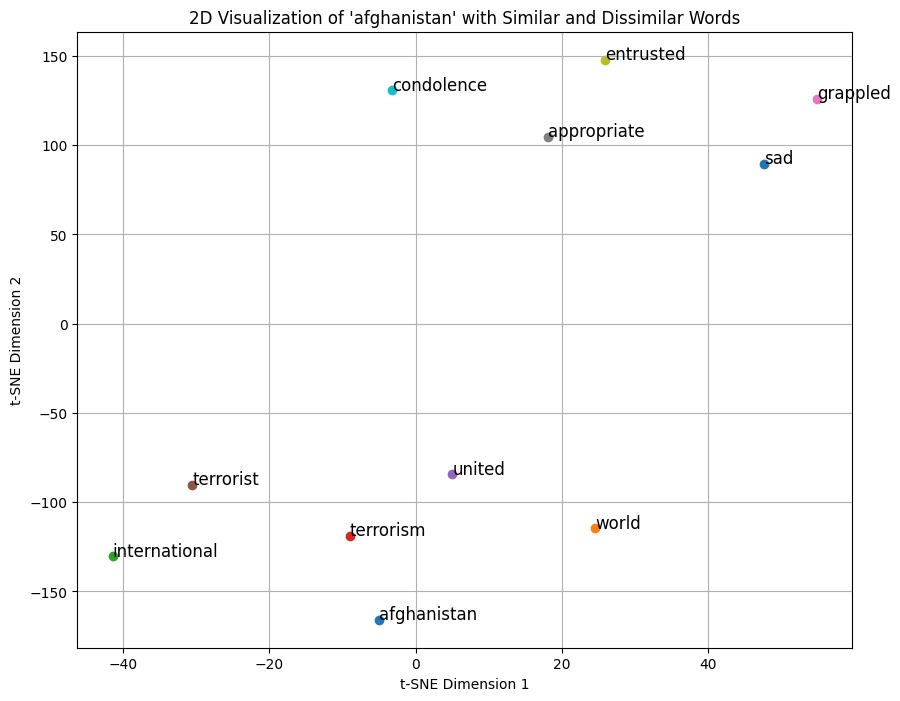

In [38]:
# Get 5 most similar words to "afghanistan"
target_word = 'afghanistan'
similar_words = model.wv.most_similar(target_word, topn=5)

# Get 5 most dissimilar words by sorting the vocabulary based on similarity score
# Exclude words not in the model or those that raise errors
all_words = model.wv.index_to_key
similarities = [(word, model.wv.similarity(target_word, word)) for word in all_words if word != target_word]
dissimilar_words = sorted(similarities, key=lambda x: x[1])[:5]  # Lowest similarity

# Combine all words for visualization
words = [target_word] + [w for w, _ in similar_words] + [w for w, _ in dissimilar_words]
vectors = [model.wv[word] for word in words]

# Convert to NumPy array
vectors_np = np.array(vectors)

# t-SNE projection
tsne = TSNE(n_components=2, random_state=0, perplexity=5)
vectors_2d = tsne.fit_transform(vectors_np)

# Plotting
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    x, y = vectors_2d[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)

plt.title(f"2D Visualization of '{target_word}' with Similar and Dissimilar Words")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()

## Example 2  - PCA

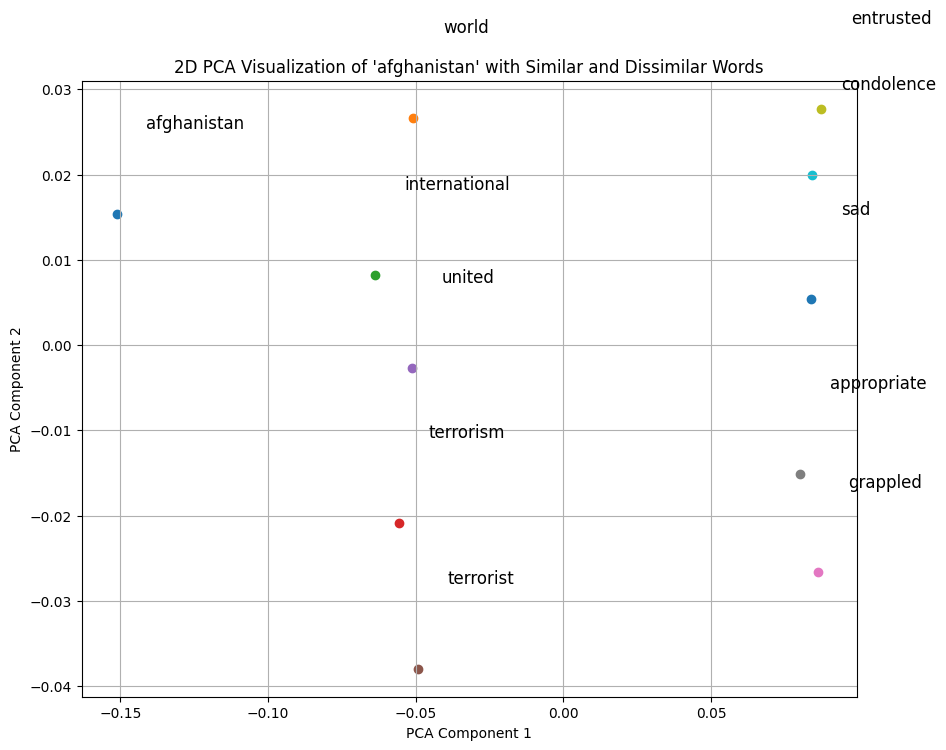

In [39]:
# Get 5 most similar words to "afghanistan"
target_word = 'afghanistan'
similar_words = model.wv.most_similar(target_word, topn=5)

# Get 5 most dissimilar words
all_words = model.wv.index_to_key
similarities = [(word, model.wv.similarity(target_word, word)) for word in all_words if word != target_word]
dissimilar_words = sorted(similarities, key=lambda x: x[1])[:5]

# Combine all words for visualization
words = [target_word] + [w for w, _ in similar_words] + [w for w, _ in dissimilar_words]
vectors = [model.wv[word] for word in words]
vectors_np = np.array(vectors)

# PCA projection to 2D
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors_np)

# Plotting
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    x, y = vectors_2d[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)

plt.title(f"2D PCA Visualization of '{target_word}' with Similar and Dissimilar Words")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


## 3.4. Contextual Embedding (BERT - The idea of Transformer)